<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Машинное обучение и майнинг данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# Занятие 3. Обучение с учителем. Методы классификации

## Часть 7. Логистическая регрессия

Основная идея логистической регрессии заключается в том, что пространство исходных значений может быть разделено линейной границей (гиперплоскостью) на две соответствующих классам области. Итак, что же имеется ввиду под линейной границей? В случае двух измерений — это просто прямая линия без изгибов. В случае трех — плоскость, и так далее. Эта граница задается в зависимости от имеющихся исходных данных и обучающего алгоритма. Чтобы все работало, точки исходных данных должны разделяться линейной границей на две вышеупомянутых области. Если точки исходных данных удовлетворяют этому требованию, то их можно назвать линейно разделяемыми.

<img src="../../img/logit.png">

Итак, мы имеем функцию, с помощью которой возможно получить значение в пределах ($-\infty$,$\infty$) имея точку исходных данных. Но каким образом преобразовать полученное значение в вероятность, пределы которой [0, 1]? Ответ — с помощью функции отношения вероятностей (OR).

Обозначим *P(X)* вероятностью происходящего события *X*. Тогда, отношение вероятностей *OR(X)* определяется из $\frac{P(X)}{1-P(X)}$, а это — отношение вероятностей того, произойдет ли событие или не произойдет. Очевидно, что вероятность и отношение шансов содержат одинаковую информацию. Но, в то время как *P(X)* находится в пределах от 0 до 1, *OR(X)* находится в пределах от 0 до $\infty$.

Это значит, что необходимо еще одно действие, так как используемая нами граничная функция выдает значения от $-\infty$ до $\infty$. Далее следует вычислить логарифм *OR(X)*, что называется логарифмом отношения вероятностей. В математическом смысле, *OR(X)* имеет пределы от 0 до $\infty$, а **log(OR(X))** — от $-\infty$ до $\infty$.

Таким образом, мы получили способ интерпретации результатов, подставленных в граничную функцию исходных значений. В используемой нами модели граничная функция определяет логарифм отношения шансов принадлежности к классу "+". Алгоритм логистической регрессии будет выглядеть следующим образом:

**Шаг 1.** Вычислить значение $\Large \beta_{0}+\beta_{1}x_1 + \beta_{2}x_2 + ... = \bar{\beta}\bar{x}$ граничной функции (она задает разделяющую гиперплоскость).


**Шаг 2.** Вычислить логарифм отношения шансов: $\Large log(OR_{+}) = \bar{\beta}\bar{x}$.

**Шаг 3.** Имея $OR_{+}$, вычислить $P_{+}$ с помощью простой зависимости.

$\Large P_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{exp^{\bar{\beta}\bar{x}}}{1 + \exp^{\bar{\beta}\bar{x}}} =  \frac{1}{1 + \exp^{-\bar{\beta}\bar{x}}} = \sigma(\bar{\beta}\bar{x})$


Правая часть уравнения, указанного выше, называется логистической (или сигмоид-) функцией. Отсюда и название, данное этой модели обучения.

<img src='../../img/sigmoid.png' width=60%>

Плюс логистической регрессии в том, что она выдает вероятность отнесения к определенному классу. Это следует также и из принципа максимума правдоподобия.

$\Large Pr(y = y_i|X = x) = \frac{1}{1 + exp^{-\bar{\beta}\bar{x}y_i}}$

Обобщение на случай *K* классов:


$\Large log\frac{Pr(y = 1|X = x)}{Pr(y = K|X = x)} = β_{T}^{(1)}x$


$\Large log\frac{Pr(y = 2|X = x)}{Pr(y = K|X = x)} = β_{T}^{(2)}x$


 ...
 
 
$\Large  log\frac{Pr(y = K − 1|X = x)}{Pr(y = K|X = x)}= β_{T}^{(K−1)}x.$

Путем несложных преобразований можно получить:

$\Large Pr(y = K|X = x) = \frac{1}{1 + \sum_{l=1}^{K-1}exp(-β_{T}^{(l)}x)}$


**Как обучается функция**

Функция проводит количественную оценку вероятности того, что точка обучающей выборки классифицируется моделью правильным образом. Поэтому среднее значение для всей обучающей выборки показывает вероятность того, что случайная точка данных будет корректно классифицирована системой, независимо от возможного класса.

По сути обучение сводится к максимизации функции максимального правдоподобия. Например, методом градиентного спуска (подъема).

$$\Large \beta^{*} = argmax_\beta{\prod_{i=1}^K P\{y = y^{(i)}, x = x^{(i)}, \beta\}}$$

На практике максимизируют логарифм функции максимального правдоподобия:

$$\Large ln \beta^{*} = argmax_\beta{\sum_{i=1}^K ln P\{y = y^{(i)}, x = x^{(i)}, \beta\}} = \sum_{i=1}^K y^{(i)}ln\sigma(\beta^Tx) + (1 - y^{(i)})ln(1 - \sigma(\beta^Tx))$$
Такая функция ошибки (в конце под знаком суммы) называется log-loss.

<img src='../../img/logloss.png'>

# Плюсы и минусы подхода

Плюсы:
 - Модель выдает вероятности отнесения к разным классам (это очень ценится, например, в кредитном скоринге)
 - Коэффициенты перед признаками могут трактоваться как важности признаков
 - Модель может строить и нелинейную границу, если на вход подать степени признаков
 
Минусы:
 - Подвержена проблеме мультиколлинеарности, как и линейная регрессия
 - Чаще всего не так хорошо работает, как SVM и ансамбли 

## Пример

Набор данных которые мы будем использовать - данные об изменах, сам набор есть в Statsmodels. Он был создан из опросника в женском журнале Redbook (1974), в котором у женщин спрашивали про их внебрачную активность. Более подробная информация об исследовании <a href="http://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf">доступна</a> в Journal of Political Economy (1978).

#### Описание данных

Всего в данных 6366 наблюдений из 9 переменных:

* **rate_marriage**: женщина оценивает свой брак оценкой от 1 до 5, где (1 = все очень плохо, 5 = все очень хорошо)

* **age**: возраст

* **yrs_married**: длительность брака (в годах)

* **children**: количество детей

* **religious**: женщина оценивает свою религиозность, где (1 = атеист, 4 = сильно верующая)

* **educ**: уровень образования (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

* **occupation**: занятость (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

* **occupation_husb**: профессия мужа (в кодировке сверху)

* **affairs**: время проведенное "в интригах"

#### Постановка задачи

Поставим задачу классификации, добавив бинарную переменную affair которая показывает, изменяла ли женщина хотя бы один раз или нет. И спрогнозируем значение для каждой женщины.

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import seaborn as sns
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load dataset
data = pd.read_csv('../../data/affairs.csv', index_col=0)

In [3]:
data['affairs'].head()

0    0.111111
1    3.230769
2    1.400000
3    0.727273
4    4.666666
Name: affairs, dtype: float64

In [4]:
# add "affair" column: 1 represents having affairs, 0 represents not
data['affair'] = (data.affairs > 0).astype(int)

In [5]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [7]:
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


**Немного визуализации**

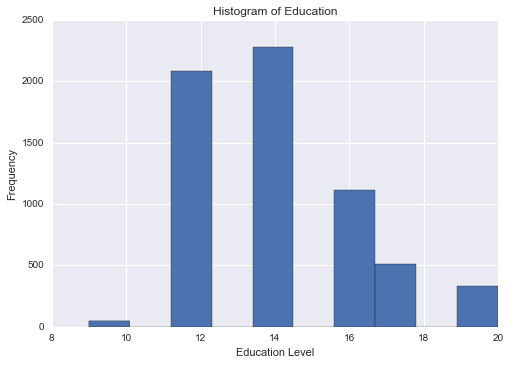

In [8]:
# histogram of education
data.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

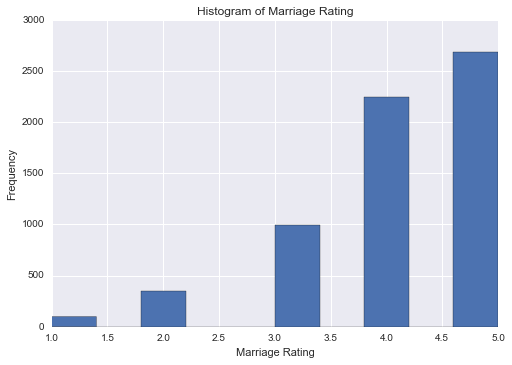

In [9]:
# histogram of marriage rating
data.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

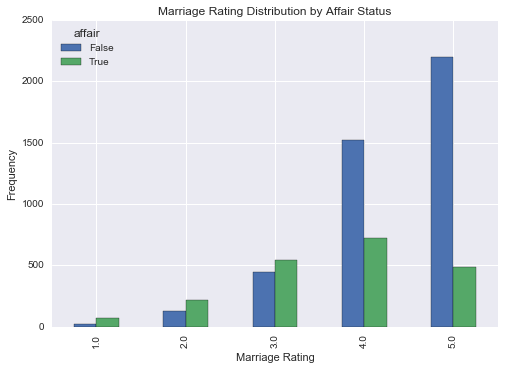

In [10]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(data.rate_marriage, 
            data.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')


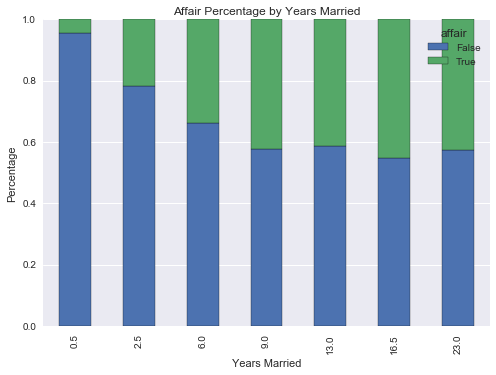

In [11]:
affair_yrs_married = pd.crosstab(data.yrs_married, 
                                 data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), 
                       axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

**Готовим данные**

Для подготовки данных добавим столбец с пересечением для occupation и occupation_husb и немного dummy переменных, поскольку будем рассматривать эти значения как категориальные. В этом поможет метод dmatrices модуля patsy.

In [12]:
X = pd.concat([data,
               pd.get_dummies(data['children'], prefix="ch"),
               pd.get_dummies(data['religious'], prefix="rel"),
               pd.get_dummies(data['rate_marriage'], prefix="mar"),
               pd.get_dummies(data['educ'], prefix="educ"),
               pd.get_dummies(data['occupation'], prefix="occ"),
               pd.get_dummies(data['occupation_husb'], prefix="occ_husb")],
               axis=1)

In [13]:
X.columns

Index([u'rate_marriage', u'age', u'yrs_married', u'children', u'religious',
       u'educ', u'occupation', u'occupation_husb', u'affairs', u'affair',
       u'ch_0.0', u'ch_1.0', u'ch_2.0', u'ch_3.0', u'ch_4.0', u'ch_5.5',
       u'rel_1.0', u'rel_2.0', u'rel_3.0', u'rel_4.0', u'mar_1.0', u'mar_2.0',
       u'mar_3.0', u'mar_4.0', u'mar_5.0', u'educ_9.0', u'educ_12.0',
       u'educ_14.0', u'educ_16.0', u'educ_17.0', u'educ_20.0', u'occ_1.0',
       u'occ_2.0', u'occ_3.0', u'occ_4.0', u'occ_5.0', u'occ_6.0',
       u'occ_husb_1.0', u'occ_husb_2.0', u'occ_husb_3.0', u'occ_husb_4.0',
       u'occ_husb_5.0', u'occ_husb_6.0'],
      dtype='object')

In [14]:
y = data['affair']

In [15]:
X.drop(['rate_marriage', 'occupation', 'occupation_husb', 'religious', 
        'children', 'educ', 'affairs', 'affair', ], 
       axis=1, inplace=True)

In [16]:
X.head()

,age,yrs_married,ch_0.0,ch_1.0,ch_2.0,ch_3.0,ch_4.0,ch_5.5,rel_1.0,rel_2.0,...,occ_3.0,occ_4.0,occ_5.0,occ_6.0,occ_husb_1.0,occ_husb_2.0,occ_husb_3.0,occ_husb_4.0,occ_husb_5.0,occ_husb_6.0
0,32.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,27.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,22.0,2.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,37.0,16.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Теперь сама логистическая регрессия**

In [17]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.72950047125353445

73% - довольно неплохой результат, но

In [18]:
# what percentage had affairs?
y.mean()

0.3224945020420987

Только 32% изменяли, это значит что можно добиться 68% только предсказывая "no". Видно, что наш результат лучше, но не намного.

Посмотрим на коэффициенты:

In [19]:
# examine the coefficients
coef_table = {}
for var, coef in zip(X.columns, np.transpose(model.coef_)):
    coef_table[var] = coef[0]
sorted(coef_table.items(), key=operator.itemgetter(1))

[('mar_5.0', -1.2630883529873511),
 ('rel_4.0', -0.6625796789254258),
 ('mar_4.0', -0.56481251746169547),
 ('occ_1.0', -0.5215288561927236),
 ('occ_2.0', -0.21435807054786329),
 ('ch_5.5', -0.17218725800629761),
 ('ch_0.0', -0.15565014556695866),
 ('occ_4.0', -0.13544679934263498),
 ('occ_husb_1.0', -0.062455837624738685),
 ('ch_4.0', -0.060058477166890951),
 ('age', -0.057021797020363828),
 ('educ_20.0', -0.04393670190668382),
 ('educ_9.0', -0.037483685483191087),
 ('rel_3.0', -0.035968969499403231),
 ('educ_16.0', -0.028252521937542373),
 ('educ_12.0', -0.0041065370893933134),
 ('occ_husb_4.0', -0.0025473750468072371),
 ('occ_husb_5.0', 0.029141464987371947),
 ('occ_husb_2.0', 0.040812923386499694),
 ('occ_husb_6.0', 0.050726217108836118),
 ('ch_3.0', 0.054424425949504703),
 ('occ_3.0', 0.083220902828202742),
 ('yrs_married', 0.10194836296426973),
 ('educ_17.0', 0.10911223957778091),
 ('occ_husb_3.0', 0.13615237478956452),
 ('educ_14.0', 0.19649697443990949),
 ('ch_1.0', 0.2325598449

Рост значений в показателях: качество брака и религиозности негативно сказывается на вероятности измены (довольно логичное наблюдение). Для профессии наименьшая вероятность измены как у жены, так и у мужа - базовая (студенты).

**Оценка модели**

In [20]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Теперь надо разметить тестовую выборку.

In [21]:
# predict class labels for the test set
predicted = model2.predict(X_test)
predicted

array([1, 0, 0, ..., 0, 0, 0])

In [22]:
# generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[ 0.24934975,  0.75065025],
       [ 0.94414949,  0.05585051],
       [ 0.74447549,  0.25552451],
       ..., 
       [ 0.61217716,  0.38782284],
       [ 0.84828399,  0.15171601],
       [ 0.67759931,  0.32240069]])

Как можно заметить, классификатор выдает 1 (измена была) каждый раз, когда вероятность больше чем 0.5.
Давайте посмотрим результат на стандартных метриках.

In [23]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.728795811518
0.751038346434


In [24]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1154  149]
 [ 369  238]]
             precision    recall  f1-score   support

          0       0.76      0.89      0.82      1303
          1       0.61      0.39      0.48       607

avg / total       0.71      0.73      0.71      1910



**Кросс-валидация**

In [25]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, 
                         scoring='accuracy', cv=10)
print(scores, scores.mean())

[ 0.71943574  0.68808777  0.73510972  0.70125786  0.70440252  0.74213836
  0.73113208  0.70283019  0.74842767  0.76100629] 0.723382819739
